In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_datetime

In [2]:
df = pd.read_csv("raw_analyst_ratings.csv")

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    324292.000000
mean         73.284154
std          40.397130
min           5.000000
25%          47.000000
50%          64.000000
75%          87.000000
max         509.000000
Name: headline_length, dtype: float64


In [5]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                  52910
Lisa Levin                     45885
Benzinga Newsdesk              35344
Charles Gross                  21297
Monica Gerson                  20052
                               ...  
Investopedia                       1
Dual Income No Kids Finance        1
BullBearTrades                     1
CPL                                1
Zoey Parks                         1
Name: count, Length: 762, dtype: int64


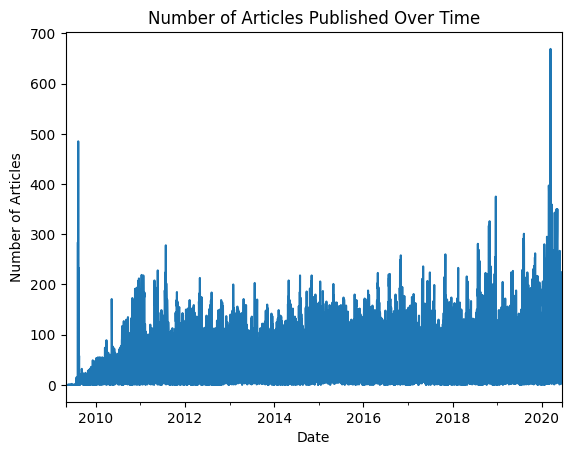

In [29]:
df['date'] = to_datetime(df['date'], utc=True)
df.set_index('date', inplace=True)
df.resample('D').size().plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
